# Temperature and Rainfall Analysis using PyCaret - Regression

### Step 1: Merging the dataset

In [76]:
import pandas as pd

temperature_df = pd.read_excel('dataset/Temp_SRS_1Jan1964_to_31Oct2020.xlsx')
rainfall_df = pd.read_csv('dataset/Rainfall_at_SRS_30Nov1960_to_18Nov2020.csv')

rainfall_df = rainfall_df.fillna(0)

temperature_df['DATE'] = pd.to_datetime(temperature_df['DATE'], format='%Y-%m-%d')
rainfall_df['DATE'] = pd.to_datetime(rainfall_df['DATE'], format='%m/%d/%Y')

temperature_df['YEAR'] = pd.to_datetime(temperature_df.DATE).dt.year
rainfall_df['YEAR'] = pd.to_datetime(rainfall_df.DATE).dt.year

temperature_df_grouped = temperature_df.groupby('YEAR').agg({'LOW TEMP': 'mean', 'HIGH TEMP': 'mean'})
temperature_df_grouped['RAINFALL'] = rainfall_df.groupby('YEAR').agg({'200-F Rainfall (inches/day)': 'mean'})
rain_temp_df = pd.merge(temperature_df, rainfall_df, on='DATE')

temperature_df_grouped.head()
# print(rain_temp_df.head(10))

,LOW TEMP,HIGH TEMP,RAINFALL
YEAR,,,
1964,52.980822,74.909589,0.196011
1965,52.030137,74.164384,0.123014
1966,51.624658,73.520548,0.131699
1967,52.408219,75.449315,0.116438
1968,53.278689,75.653005,0.094740


## Predicting rainfall using average yearly maximum and minimum temperatures

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:48:13
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

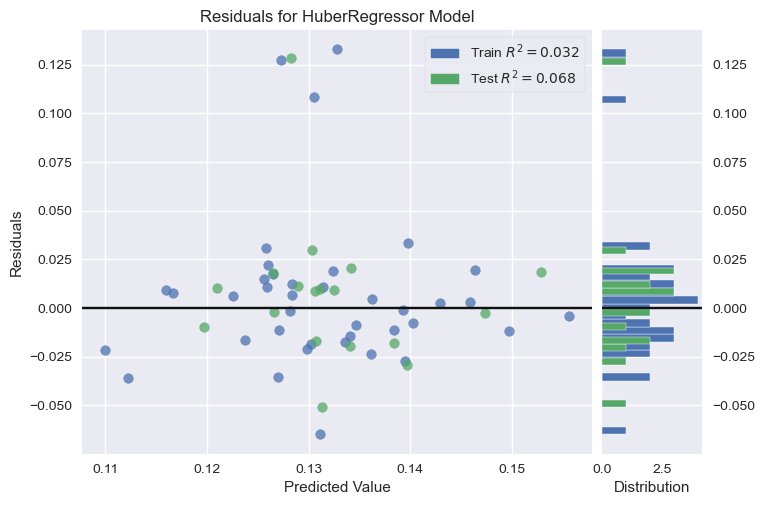

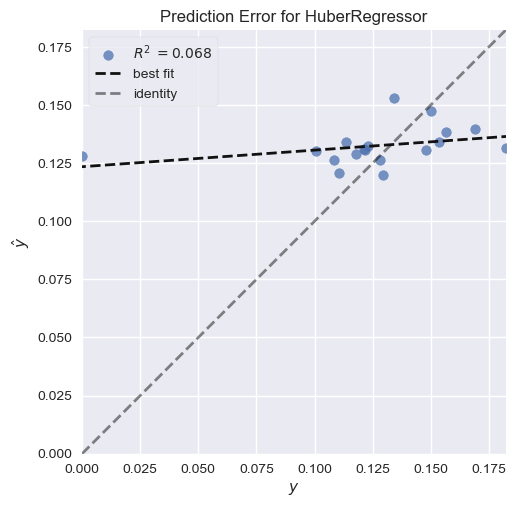

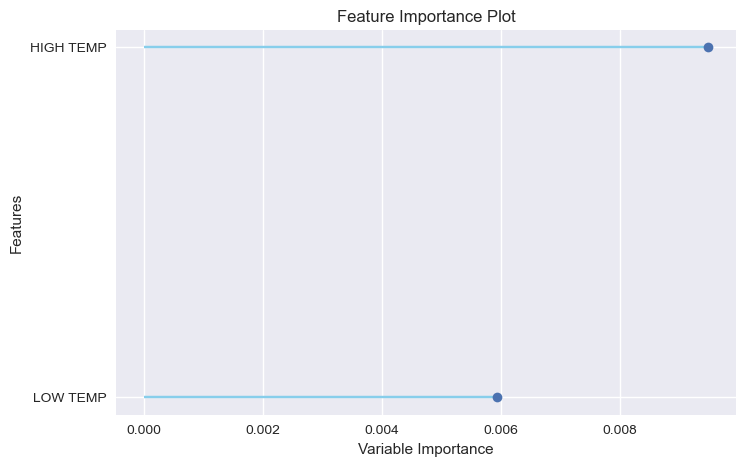

,LOW TEMP,HIGH TEMP
YEAR,,
1964,52.980822,74.909589
1965,52.030137,74.164384
1966,51.624658,73.520548
1967,52.408219,75.449315
1968,53.278689,75.653005


In [77]:
from pycaret.regression import *

s = setup(temperature_df_grouped, target='RAINFALL')
best = compare_models()

plot_model(best, plot='residuals')
plot_model(best, plot='error')
plot_model(best, plot='feature')

new_data = temperature_df_grouped.copy()
new_data.drop('RAINFALL', axis=1, inplace=True)
new_data.head()


In [82]:
predictions = predict_model(best, data=new_data)
predictions.tail()

,LOW TEMP,HIGH TEMP,prediction_label
YEAR,,,
2016,56.986340,77.819672,0.127254
2017,57.109589,77.547943,0.130561
2018,55.917809,75.975342,0.138398
2019,56.747944,77.684929,0.127117
2020,59.570492,78.718033,0.134067


In [81]:
temperature_df_grouped.tail()

,LOW TEMP,HIGH TEMP,RAINFALL
YEAR,,,
2016,56.986339,77.819672,0.000000
2017,57.109589,77.547945,0.021973
2018,55.917808,75.975342,0.149699
2019,56.747945,77.684932,0.138438
2020,59.570492,78.718033,0.153447


### Step 2: Using PyCaret for exploration

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:39:25
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

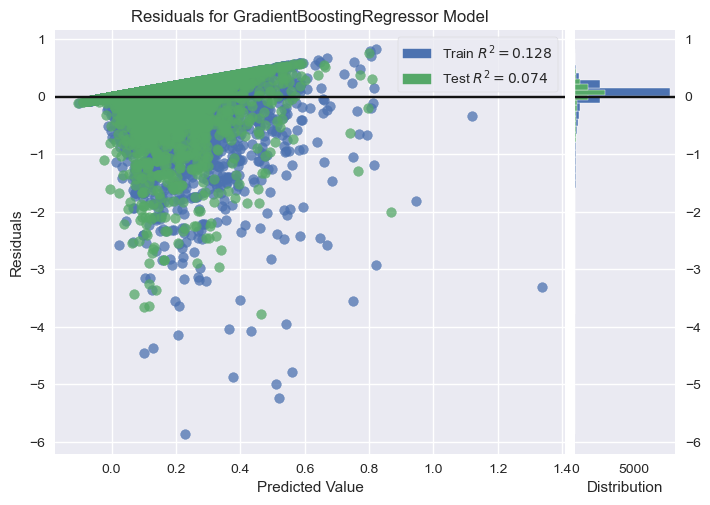

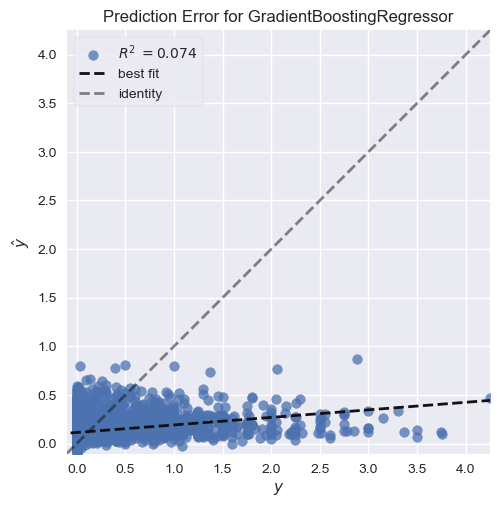

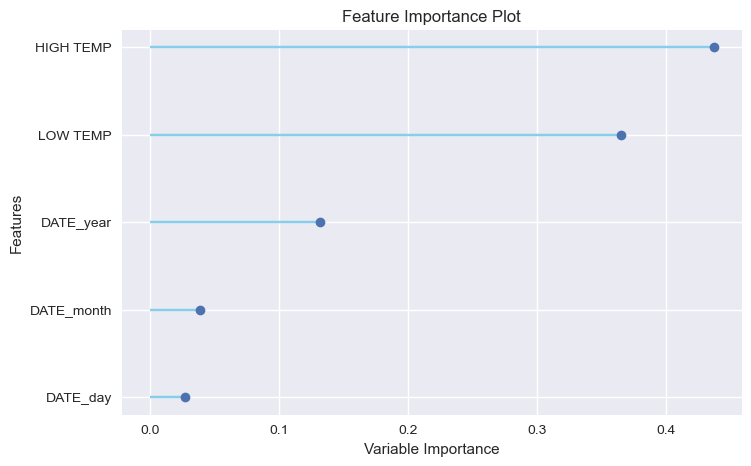

In [43]:
from pycaret.regression import *

s = setup(rain_temp_df, target='200-F Rainfall (inches/day)')
best = compare_models()
# results = pull()
# print(results)

plot_model(best, plot='residuals')
plot_model(best, plot='error')
plot_model(best, plot='feature')

pred = predict_model(best)

pred.head()

In [44]:
pred = predict_model(best)

pred.head()

,DATE,LOW TEMP,HIGH TEMP,200-F Rainfall (inches/day),prediction_label
9068,1988-10-31,44,57,0.65,0.178668
9780,1990-10-13,68,85,0.00,0.104418
18357,2014-04-08,48,69,0.00,0.058227
9356,1989-08-15,71,84,0.03,0.299466
2766,1971-07-31,70,90,1.66,0.194829


In [45]:
new_data = rain_temp_df.copy()
new_data.drop('200-F Rainfall (inches/day)', axis=1, inplace=True)
new_data.head()

,DATE,LOW TEMP,HIGH TEMP
0,1964-01-01,30,36
1,1964-01-02,25,50
2,1964-01-03,32,64
3,1964-01-04,43,59
4,1964-01-05,39,61


In [46]:
predictions = predict_model(best, data=new_data)
predictions.head(20)

,DATE,LOW TEMP,HIGH TEMP,prediction_label
0,1964-01-01,30,36,0.390630
1,1964-01-02,25,50,0.256714
2,1964-01-03,32,64,0.079895
3,1964-01-04,43,59,0.232375
4,1964-01-05,39,61,0.125111
5,1964-01-06,50,65,0.340147
6,1964-01-07,53,66,0.317587
7,1964-01-08,42,53,0.340136
8,1964-01-09,42,56,0.291042
9,1964-01-10,29,42,0.197700


In [47]:
rain_temp_df.head(20)

,DATE,LOW TEMP,HIGH TEMP,200-F Rainfall (inches/day)
0,1964-01-01,30,36,0.01
1,1964-01-02,25,50,0.00
2,1964-01-03,32,64,0.00
3,1964-01-04,43,59,0.00
4,1964-01-05,39,61,0.00
5,1964-01-06,50,65,0.10
6,1964-01-07,53,66,0.20
7,1964-01-08,42,53,2.01
8,1964-01-09,42,56,0.60
9,1964-01-10,29,42,0.00
